In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:

# Features (X): Each row is a customer vector [income, credit_score]
X = np.array([
    [50, 650], [85, 780], [40, 580], [95, 820], [35, 590],
    [65, 710], [75, 750], [45, 610], [105, 850], [60, 690]
])

# 0: Denied, 1: Approved
y = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])


In [18]:

print("--- The Dataset (as NumPy arrays) ---")
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

--- The Dataset (as NumPy arrays) ---
Features (X):
[[ 50 650]
 [ 85 780]
 [ 40 580]
 [ 95 820]
 [ 35 590]
 [ 65 710]
 [ 75 750]
 [ 45 610]
 [105 850]
 [ 60 690]]

Target (y):
[0 1 0 1 0 1 1 0 1 0]


In [ ]:
approved = X[y == 1]
denied = X[y == 0]



array([[ 85, 780],
       [ 95, 820],
       [ 65, 710],
       [ 75, 750],
       [105, 850]])

In [22]:
approved[:, 1]

array([780, 820, 710, 750, 850])

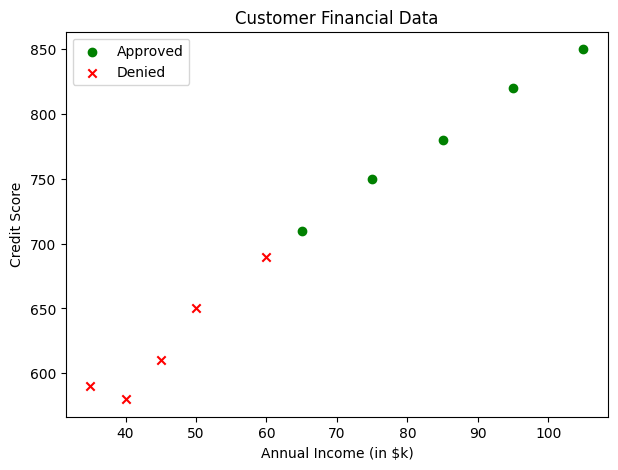

In [29]:
approved = X[y == 1]
denied = X[y == 0]

plt.figure(figsize=(7, 5))
plt.scatter(approved[:, 0], approved[:, 1], c='green', marker='o', label='Approved')
plt.scatter(denied[:, 0], denied[:, 1], c='red', marker='x', label='Denied')

plt.title('Customer Financial Data')
plt.xlabel('Annual Income (in $k)')
plt.ylabel('Credit Score')
plt.legend()
# plt.grid(True)
plt.show()

### Customer Similarity: Calculating Vector Distance

In [ ]:
customer_A = X[0]  # [50, 650], Denied
customer_C = X[2]  # [40, 580], Denied

# This function works for any number of dimensions
def euclidean_distance(vec1, vec2):
    """Calculates the distance between two vectors."""
    return np.sqrt(np.sum((vec1 - vec2)**2))

# Calculate the distance between two similar (denied) customers
distance = euclidean_distance(customer_A, customer_C)
print(f"Vector for Customer A: {customer_A}")
print(f"Vector for Customer C: {customer_C}")
print(f"Distance between A and C: {distance:.2f}")

# Now, compare with a dissimilar (approved) customer
customer_B = X[1]  # [85, 780], Approved
distance_dissimilar = euclidean_distance(customer_A, customer_B)
print(f"\nVector for Customer B: {customer_B}")
print(f"Distance between A and B: {distance_dissimilar:.2f}")

NameError: name 'X' is not defined

: 

In [31]:
#  The Line Equation and Weights: Defining the Separator

w1 = -0.15  # Weight for feature 1 (income)
w2 = 0.025 # Weight for feature 2 (credit_score)
w0 = -5    # Bias/Intercept

print(f"Defined Weights: w1={w1}, w2={w2}")
print(f"Defined Bias: w0={w0}")
print(f"\nOur Line Equation: {w1}*income + {w2}*score + {w0} = 0")

Defined Weights: w1=-0.15, w2=0.025
Defined Bias: w0=-5

Our Line Equation: -0.15*income + 0.025*score + -5 = 0


In [32]:

W = np.array([w1, w2])
X_new = np.array([90, 760]) 

# Perform the dot product calculation
score = np.dot(W, X_new) + w0

print(f"Weight Vector W: {W}")
print(f"New Applicant X_new: {X_new}")
print(f"Bias w0: {w0}")
print("--- Calculation ---")
print(f"Score (W • X + w0) = {score:.2f}")

if score > 0:
    print("Prediction: Approved ✅")
else:
    print("Prediction: Denied ❌")

Weight Vector W: [-0.15   0.025]
New Applicant X_new: [ 90 760]
Bias w0: -5
--- Calculation ---
Score (W • X + w0) = 0.50
Prediction: Approved ✅


In [37]:
w1 = -0.35  # Weight for feature 1 (income)
w2 = 0.025 # Weight for feature 2 (credit_score)
w0 = 5 

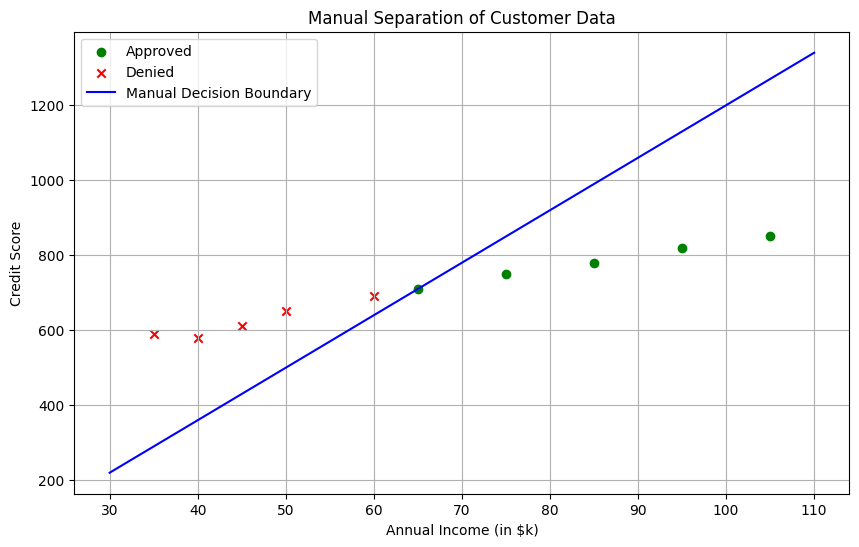

In [38]:
# Plot the original data again
plt.figure(figsize=(10, 6))
plt.scatter(approved[:, 0], approved[:, 1], c='green', marker='o', label='Approved')
plt.scatter(denied[:, 0], denied[:, 1], c='red', marker='x', label='Denied')


income_vals = np.array([X[:, 0].min() - 5, X[:, 0].max() + 5])

score_vals = (-w1 * income_vals - w0) / w2


plt.plot(income_vals, score_vals, 'b-', label='Manual Decision Boundary')
plt.title('Manual Separation of Customer Data')
plt.xlabel('Annual Income (in $k)')
plt.ylabel('Credit Score')
plt.legend()
plt.grid(True)
plt.show()

## 🧠 The Business Problem: Simple Portfolio Allocation 📈

An investor in **Varanasi** has a total of **₹1,00,000** to invest.  
They want to allocate this capital across two assets to achieve a **precise total annual return of ₹7,500**.

### 🏦 The Investment Options:

- **Low-Risk Bond**  
  🟢 Expected Annual Return: **5%**

- **High-Risk Stock**  
  🔴 Expected Annual Return: **12%**

---

### ❓ The Objective

Determine the **exact amount of money to invest in each asset** such that:

- ✅ Total investment = ₹1,00,000  
- ✅ Total annual return = ₹7,500  

This is a **linear allocation problem** involving **two variables** and **two constraints**:

1. **x + y = 1,00,000**  
2. **0.05x + 0.12y = 7,500**

Where:  
- `x` = amount invested in bonds  
- `y` = amount invested in stocks


## 📐 Mathematical Formulation

Let:

- `x` = amount of money (in ₹) invested in the **Low-Risk Bond**  
- `y` = amount of money (in ₹) invested in the **High-Risk Stock**

---

### 🔢 System of Equations

1. **Total Investment Equation:**  
   \( x + y = 1,00,000 \)

2. **Total Return Equation:**  
   \( 0.05x + 0.12y = 7,500 \)

---

### 🧮 Linear Algebra Representation: Ax = b

We can write this system as a **matrix equation**:

\[
\begin{bmatrix}
1 & 1 \\
0.05 & 0.12
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
100000 \\
7500
\end{bmatrix}
\]

Where:

- **A** is the coefficient matrix  
  \[
  A =
  \begin{bmatrix}
  1 & 1 \\
  0.05 & 0.12
  \end{bmatrix}
  \]

- **x** is the variable vector  
  \[
  x =
  \begin{bmatrix}
  x \\
  y
  \end{bmatrix}
  \]

- **b** is the constant vector  
  \[
  b =
  \begin{bmatrix}
  100000 \\
  7500
  \end{bmatrix}
  \]

This matrix equation compactly represents our portfolio allocation problem.


In [ ]:
import numpy as np

# A = The coefficient matrix
A = np.array([
    [1, 1],
    [0.05, 0.12]
])

# b = The constant vector (total capital, target return)
b = np.array([100000, 7500])



# Step 1: Calculate the inverse of the coefficient matrix A
A_inverse = np.linalg.inv(A)

# Step 2: Multiply the inverse of A by b to find the solution vector x
x_solution = np.dot(A_inverse, b)

# The result contains the amounts for [x, y]
bond_investment = x_solution[0]
stock_investment = x_solution[1]

print("--- The Financial Solution ---")
print(f"Invest ₹{bond_investment:,.2f} in the Low-Risk Bond.")
print(f"Invest ₹{stock_investment:,.2f} in the High-Risk Stock.")

# --- Verification ---
total_investment = bond_investment + stock_investment
total_return = (0.05 * bond_investment) + (0.12 * stock_investment)

print("\n--- Verification ---")
print(f"Total Amount Invested: ₹{total_investment:,.2f}")
print(f"Total Annual Return: ₹{total_return:,.2f}")